# Imports

In [1]:
from pyspark import SparkContext
from pyspark import SparkConf
#sc = SparkContext()
import pyspark
from pyspark import SparkConf, SparkContext 
import pandas as pd 
from pyspark.sql import functions as f
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pyspark.sql.functions import *

In [2]:
spark_conf = SparkConf().set('spark.executor.memory', '6G').set('spark.driver.memory', '6G').set('spark.driver.maxResultSize', '6G')
# spark_conf = SparkConf().setAppName("test")
sc = SparkContext(conf = spark_conf)
# sc = SparkContext.getOrCreate()
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
from pyspark.sql.session import SparkSession
spark = SparkSession(sc)

# Read Accident data

In [3]:
df = spark.read.parquet("/Users/pprusty05/workspace/Data_mining/Project/data_folder/accident_data/Accident.parquet")

In [4]:
df_pd=df.limit(10).toPandas()

In [5]:
df_pd

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2476200,Bing,None,4,2017-07-12 17:49:09,2017-07-12 23:49:09,33.769969,-84.519786,33.770300,-84.519180,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-2476201,Bing,None,2,2017-07-12 16:55:07,2017-07-12 22:55:07,42.985070,-87.915350,42.977940,-87.916110,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-2476202,Bing,None,3,2017-07-12 16:52:48,2017-07-12 22:52:48,36.121430,-86.756330,36.123690,-86.747710,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-2476203,Bing,None,3,2017-07-12 16:55:07,2017-07-12 22:55:07,41.761268,-87.945109,41.761295,-87.945109,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2476204,Bing,None,2,2017-07-12 17:57:14,2017-07-12 23:57:14,43.703396,-70.313522,43.692033,-70.320149,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-2476205,Bing,None,3,2017-07-12 16:59:29,2017-07-12 22:59:29,35.979230,-86.575250,35.971110,-86.568860,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-2476206,Bing,None,3,2017-07-12 18:05:29,2017-07-13 00:05:29,40.898080,-74.247540,40.896300,-74.254890,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-2476207,Bing,None,2,2017-07-12 18:11:29,2017-07-13 00:11:29,40.819015,-73.934388,40.819015,-73.934388,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-2476208,Bing,None,3,2017-07-12 18:13:48,2017-07-13 00:13:48,35.015940,-85.278270,35.017230,-85.282640,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-2476209,Bing,None,2,2017-07-12 18:27:19,2017-07-13 00:27:19,39.311562,-76.952013,39.310469,-76.952345,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.columns

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature',
 'Wind_Chill',
 'Humidity',
 'Pressure',
 'Visibility',
 'Wind_Direction',
 'Wind_Speed',
 'Precipitation',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

# Visualization

## Temperature vs accident

In [7]:
df.groupby('Temperature').count().show()


+-----------+-----+
|Temperature|count|
+-----------+-----+
|       69.8|15067|
|       74.5|  503|
|       64.2|  333|
|       49.8|  256|
|       56.8|  418|
|       14.9|   84|
|      -12.3|    4|
|       15.4|   90|
|       47.5|  380|
|      107.8|    5|
|       72.3|  361|
|       70.0|52212|
|       96.8| 1604|
|       67.0|14092|
|        8.0|  128|
|       45.3|  287|
|       10.2|   40|
|       55.8|  440|
|       44.8|  386|
|       56.5|  429|
+-----------+-----+
only showing top 20 rows



## Binning 

In [8]:
df_with_temp_range = df.withColumn('TemperatureRange', f.when(f.col('Temperature') < 0, "<0").
              when((f.col('Temperature') >= 0) & (f.col('Temperature') < 10), "0-10").
              when((f.col('Temperature') >= 10) & (f.col('Temperature') < 20), "10-20").
              when((f.col('Temperature') >= 20) & (f.col('Temperature') < 30), "20-30").
              when((f.col('Temperature') >= 30) & (f.col('Temperature') < 40), "30-40").
              when((f.col('Temperature') >= 40) & (f.col('Temperature') < 50), "40-50").
              when((f.col('Temperature') >= 50) & (f.col('Temperature') < 60), "50-60").
              when((f.col('Temperature') >= 60) & (f.col('Temperature') < 70), "60-70").
              when((f.col('Temperature') >= 70) & (f.col('Temperature') < 80), "70-80").
              when((f.col('Temperature') >= 80) & (f.col('Temperature') < 90), "80-90").
              when((f.col('Temperature') >= 90) & (f.col('Temperature') < 100), "90-100").
              when((f.col('Temperature')) >= 100 , ">100").
              otherwise("NA"))

## Convert to pandas df

In [9]:
df_temp_range_count = df_with_temp_range.groupby('TemperatureRange').count().toPandas()

In [10]:
df_temp_range_count

,TemperatureRange,count
0,>100,13221
1,40-50,292225
2,NA,56063
3,20-30,99794
4,80-90,411734
5,60-70,585878
6,<0,5061
7,50-60,483909
8,0-10,13039
9,30-40,239476


## drop row containing NA

In [11]:
df_temp_acc=df_temp_range_count.drop([2])

## sort temperature

In [12]:
df_sorted_temp = df_temp_acc.sort_values('TemperatureRange')

In [13]:
df_sorted_temp

,TemperatureRange,count
8,0-10,13039
10,10-20,42485
3,20-30,99794
9,30-40,239476
1,40-50,292225
7,50-60,483909
5,60-70,585878
11,70-80,610008
4,80-90,411734
12,90-100,121442


In [14]:
target_row = 10
# Move target row to first element of list.
idx = [target_row] + [i for i in range(len(df_sorted_temp)) if i != target_row]

final_temp_acc=df_sorted_temp.iloc[idx]
 

In [15]:
final_temp_acc

,TemperatureRange,count
6,<0,5061
8,0-10,13039
10,10-20,42485
3,20-30,99794
9,30-40,239476
1,40-50,292225
7,50-60,483909
5,60-70,585878
11,70-80,610008
4,80-90,411734


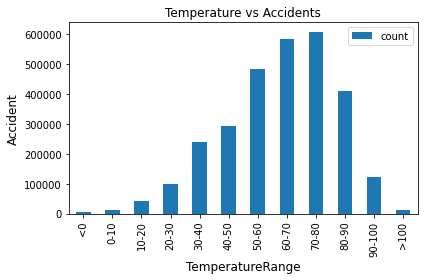

In [16]:

#ax = df_temp_range_count['count'].plot(kind='bar', title ="Accident based on Temperature", figsize=(15, 10), legend=True, fontsize=12)
ax = final_temp_acc.plot(x="TemperatureRange", y="count", kind="bar")
ax.set_ylabel("Accident", fontsize=12)
ax.set_xlabel("TemperatureRange", fontsize=12)
ax.set_title("Temperature vs Accidents")
rcParams.update({'figure.autolayout': True})
plt.tight_layout()
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('font', family='serif')
plt.savefig('/Users/pprusty05/google_drive/Data_Mining/Project/plots/Temp_vs_Accident.pdf')
plt.show()


## States Vs Accident

In [17]:
df_state=df.groupby('State').count().toPandas()

In [18]:
top20_state=df_state.sort_values('count').tail(20)

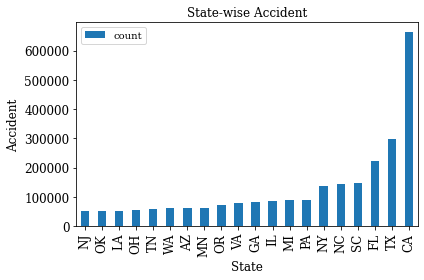

In [19]:

ax = top20_state.plot(x="State", y="count", kind="bar",fontsize=12)
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Accident", fontsize=12)
ax.set_title("State-wise Accident")
rcParams.update({'figure.autolayout': True})
plt.tight_layout()
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
# plt.xticks(rotation=90)
plt.savefig('/Users/pprusty05/google_drive/Data_Mining/Project/plots/State_vs_Accident.pdf')
plt.show()

## Hour Vs Accident

## add hour column

In [20]:
df_accident = df.withColumn('Hour', hour(df.Start_Time))

## convert to pandas df

In [21]:
df_hour=df_accident.groupby('Hour').count().toPandas()

## sort by hour

In [22]:
df_hour=df_hour.sort_values('Hour')

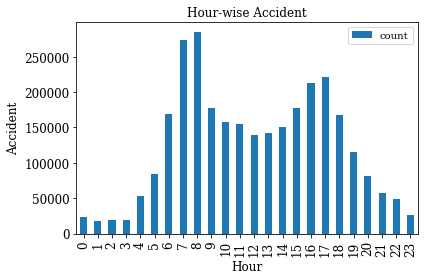

In [23]:
ax = df_hour.plot(x="Hour", y="count", kind="bar")
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Accident", fontsize=12)
ax.set_title("Hour-wise Accident")
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.tight_layout()
plt.savefig('/Users/pprusty05/google_drive/Data_Mining/Project/plots/Hour_vs_Accident.pdf')
plt.show()

## Road Vs Accident

In [4]:
df_road=df['Bump','Crossing','Give_Way','Junction','No_Exit']

In [5]:
df_road=df_road.toPandas()

In [6]:
df_road

,Bump,Crossing,Give_Way,Junction,No_Exit
0,False,True,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2974330,False,False,False,False,False
2974331,False,False,False,False,False
2974332,False,False,False,True,False
2974333,False,False,False,False,False


In [7]:
df1 = df_road.apply(pd.value_counts)
print (df1)

          Bump  Crossing  Give_Way  Junction  No_Exit
False  2973881   2766745   2966708   2735888  2970940
True       454    207590      7627    238447     3395


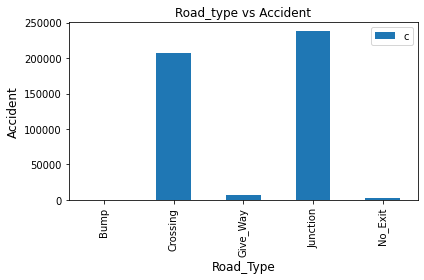

In [8]:
#df1.loc[True].plot.bar()
ax = df1.loc[True].plot.bar()
ax.set_xlabel("Road_Type", fontsize=12)
ax.set_ylabel("Accident", fontsize=12)
ax.set_title("Road_type vs Accident")
ax.legend('count',loc='best')
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.tight_layout()
plt.savefig('/Users/pprusty05/google_drive/Data_Mining/Project/plots/Road_vs_Accident.pdf')
plt.show()

# missing values

In [9]:
#missing data in the dataset
def find_missing_values(df):
    missing_value_dict = {}
    for column_name in df.columns:
        missing_value_count = df.where(df[column_name].isNull()).count()
        missing_value_percent = (missing_value_count / df.count()) * 100
        missing_value_dict[column_name] = {}
        missing_value_dict[column_name]['count'] =  missing_value_count
        missing_value_dict[column_name]['percent'] =  missing_value_percent

    missing_value_pd = pd.DataFrame(missing_value_dict).T
    return missing_value_pd


In [10]:
missing_value_pd=find_missing_values(df)

In [11]:
missing_value_pd

,count,percent
ID,0.0,0.000000
Source,0.0,0.000000
TMC,728071.0,24.478446
Severity,0.0,0.000000
Start_Time,0.0,0.000000
End_Time,0.0,0.000000
Start_Lat,0.0,0.000000
Start_Lng,0.0,0.000000
End_Lat,2246264.0,75.521554
End_Lng,2246264.0,75.521554


In [12]:
missing_value_pd['count'].sum()

11817022.0

# drop columns

In [13]:
#dropping some columns
df=df.drop('ID')
df=df.drop('Description')
df=df.drop('Zipcode')

In [7]:
#find the datatype of each column
def get_data_types(df):
    col_data_type = {}
    for types in df.dtypes:
        col_data_type[types[0]] = types[1]
    return col_data_type

In [15]:
col_data_type = get_data_types(df)
col_data_type

{'Source': 'string',
 'TMC': 'double',
 'Severity': 'int',
 'Start_Time': 'timestamp',
 'End_Time': 'timestamp',
 'Start_Lat': 'double',
 'Start_Lng': 'double',
 'End_Lat': 'double',
 'End_Lng': 'double',
 'Distance': 'double',
 'Number': 'double',
 'Street': 'string',
 'Side': 'string',
 'City': 'string',
 'County': 'string',
 'State': 'string',
 'Country': 'string',
 'Timezone': 'string',
 'Airport_Code': 'string',
 'Weather_Timestamp': 'timestamp',
 'Temperature': 'double',
 'Wind_Chill': 'double',
 'Humidity': 'double',
 'Pressure': 'double',
 'Visibility': 'double',
 'Wind_Direction': 'string',
 'Wind_Speed': 'double',
 'Precipitation': 'double',
 'Weather_Condition': 'string',
 'Amenity': 'boolean',
 'Bump': 'boolean',
 'Crossing': 'boolean',
 'Give_Way': 'boolean',
 'Junction': 'boolean',
 'No_Exit': 'boolean',
 'Railway': 'boolean',
 'Roundabout': 'boolean',
 'Station': 'boolean',
 'Stop': 'boolean',
 'Traffic_Calming': 'boolean',
 'Traffic_Signal': 'boolean',
 'Turning_Loop': 

## Handle Categorical Data

In [16]:
from pyspark.ml.feature import StringIndexer

In [17]:
for keys in col_data_type:
    if col_data_type[keys] == 'string':
        print('Starting :  ' + keys)
        indexer = StringIndexer(inputCol=keys, outputCol=keys+'_index').fit(df)
        df = indexer.setHandleInvalid("keep").transform(df)
        print('Done : ' + keys)

Starting :  Source
Done : Source
Starting :  Street
Done : Street
Starting :  Side
Done : Side
Starting :  City
Done : City
Starting :  County
Done : County
Starting :  State
Done : State
Starting :  Country
Done : Country
Starting :  Timezone
Done : Timezone
Starting :  Airport_Code
Done : Airport_Code
Starting :  Wind_Direction
Done : Wind_Direction
Starting :  Weather_Condition
Done : Weather_Condition
Starting :  Sunrise_Sunset
Done : Sunrise_Sunset
Starting :  Civil_Twilight
Done : Civil_Twilight
Starting :  Nautical_Twilight
Done : Nautical_Twilight
Starting :  Astronomical_Twilight
Done : Astronomical_Twilight


In [18]:
##Convert all boolean
for keys in col_data_type:
    if col_data_type[keys] == 'boolean':
        print('Starting :  ' + keys)
        df = df.withColumn(keys,df[keys].cast('int'))
        print('Done :  ' + keys)

Starting :  Amenity
Done :  Amenity
Starting :  Bump
Done :  Bump
Starting :  Crossing
Done :  Crossing
Starting :  Give_Way
Done :  Give_Way
Starting :  Junction
Done :  Junction
Starting :  No_Exit
Done :  No_Exit
Starting :  Railway
Done :  Railway
Starting :  Roundabout
Done :  Roundabout
Starting :  Station
Done :  Station
Starting :  Stop
Done :  Stop
Starting :  Traffic_Calming
Done :  Traffic_Calming
Starting :  Traffic_Signal
Done :  Traffic_Signal
Starting :  Turning_Loop
Done :  Turning_Loop


In [19]:
col_data_type = get_data_types(df)

In [20]:
col_data_type

{'Source': 'string',
 'TMC': 'double',
 'Severity': 'int',
 'Start_Time': 'timestamp',
 'End_Time': 'timestamp',
 'Start_Lat': 'double',
 'Start_Lng': 'double',
 'End_Lat': 'double',
 'End_Lng': 'double',
 'Distance': 'double',
 'Number': 'double',
 'Street': 'string',
 'Side': 'string',
 'City': 'string',
 'County': 'string',
 'State': 'string',
 'Country': 'string',
 'Timezone': 'string',
 'Airport_Code': 'string',
 'Weather_Timestamp': 'timestamp',
 'Temperature': 'double',
 'Wind_Chill': 'double',
 'Humidity': 'double',
 'Pressure': 'double',
 'Visibility': 'double',
 'Wind_Direction': 'string',
 'Wind_Speed': 'double',
 'Precipitation': 'double',
 'Weather_Condition': 'string',
 'Amenity': 'int',
 'Bump': 'int',
 'Crossing': 'int',
 'Give_Way': 'int',
 'Junction': 'int',
 'No_Exit': 'int',
 'Railway': 'int',
 'Roundabout': 'int',
 'Station': 'int',
 'Stop': 'int',
 'Traffic_Calming': 'int',
 'Traffic_Signal': 'int',
 'Turning_Loop': 'int',
 'Sunrise_Sunset': 'string',
 'Civil_Twil

In [21]:
##remove all string data types as they have been converted already
for key in col_data_type:
    if col_data_type[key] == 'string':
        df = df.drop(key)

In [22]:
##Rename all _index to match 
for key in col_data_type:
    if '_index' in key:
        newKey = key.replace('_index', '')
        df = df.withColumnRenamed(key, newKey)

In [23]:
#Convert timestamp to epoch
for keys in col_data_type:
    if col_data_type[keys] == 'timestamp':
        print('Starting :  ' + keys)
        df = df.withColumn(keys,df[keys].cast('double'))
        print('Done :  ' + keys)

Starting :  Start_Time
Done :  Start_Time
Starting :  End_Time
Done :  End_Time
Starting :  Weather_Timestamp
Done :  Weather_Timestamp


In [24]:
col_data_type = get_data_types(df)
col_data_type

{'TMC': 'double',
 'Severity': 'int',
 'Start_Time': 'double',
 'End_Time': 'double',
 'Start_Lat': 'double',
 'Start_Lng': 'double',
 'End_Lat': 'double',
 'End_Lng': 'double',
 'Distance': 'double',
 'Number': 'double',
 'Weather_Timestamp': 'double',
 'Temperature': 'double',
 'Wind_Chill': 'double',
 'Humidity': 'double',
 'Pressure': 'double',
 'Visibility': 'double',
 'Wind_Speed': 'double',
 'Precipitation': 'double',
 'Amenity': 'int',
 'Bump': 'int',
 'Crossing': 'int',
 'Give_Way': 'int',
 'Junction': 'int',
 'No_Exit': 'int',
 'Railway': 'int',
 'Roundabout': 'int',
 'Station': 'int',
 'Stop': 'int',
 'Traffic_Calming': 'int',
 'Traffic_Signal': 'int',
 'Turning_Loop': 'int',
 'Source': 'double',
 'Street': 'double',
 'Side': 'double',
 'City': 'double',
 'County': 'double',
 'State': 'double',
 'Country': 'double',
 'Timezone': 'double',
 'Airport_Code': 'double',
 'Wind_Direction': 'double',
 'Weather_Condition': 'double',
 'Sunrise_Sunset': 'double',
 'Civil_Twilight': 'd

In [25]:
##Convert all int to doubles 
for keys in col_data_type:
    if col_data_type[keys] == 'int':
        print('Starting :  ' + keys)
        df = df.withColumn(keys,df[keys].cast('double'))
        print('Done :  ' + keys)

Starting :  Severity
Done :  Severity
Starting :  Amenity
Done :  Amenity
Starting :  Bump
Done :  Bump
Starting :  Crossing
Done :  Crossing
Starting :  Give_Way
Done :  Give_Way
Starting :  Junction
Done :  Junction
Starting :  No_Exit
Done :  No_Exit
Starting :  Railway
Done :  Railway
Starting :  Roundabout
Done :  Roundabout
Starting :  Station
Done :  Station
Starting :  Stop
Done :  Stop
Starting :  Traffic_Calming
Done :  Traffic_Calming
Starting :  Traffic_Signal
Done :  Traffic_Signal
Starting :  Turning_Loop
Done :  Turning_Loop


In [26]:
##Now lets look at the final data types
col_data_type = get_data_types(df)
col_data_type


{'TMC': 'double',
 'Severity': 'double',
 'Start_Time': 'double',
 'End_Time': 'double',
 'Start_Lat': 'double',
 'Start_Lng': 'double',
 'End_Lat': 'double',
 'End_Lng': 'double',
 'Distance': 'double',
 'Number': 'double',
 'Weather_Timestamp': 'double',
 'Temperature': 'double',
 'Wind_Chill': 'double',
 'Humidity': 'double',
 'Pressure': 'double',
 'Visibility': 'double',
 'Wind_Speed': 'double',
 'Precipitation': 'double',
 'Amenity': 'double',
 'Bump': 'double',
 'Crossing': 'double',
 'Give_Way': 'double',
 'Junction': 'double',
 'No_Exit': 'double',
 'Railway': 'double',
 'Roundabout': 'double',
 'Station': 'double',
 'Stop': 'double',
 'Traffic_Calming': 'double',
 'Traffic_Signal': 'double',
 'Turning_Loop': 'double',
 'Source': 'double',
 'Street': 'double',
 'Side': 'double',
 'City': 'double',
 'County': 'double',
 'State': 'double',
 'Country': 'double',
 'Timezone': 'double',
 'Airport_Code': 'double',
 'Wind_Direction': 'double',
 'Weather_Condition': 'double',
 'Sunris

In [27]:
##Write another parquet to save it
#df.write.parquet("/Users/pprusty05/workspace/Data_mining/Project/Accident_numeric.parquet")

In [29]:
df_numeric = spark.read.parquet("/Users/pprusty05/workspace/Data_mining/Project/data_folder/accident_data/Accident_numeric.parquet")

## Missing Values

In [30]:
mean_dict = { col: 'mean' for col in df_numeric.columns }
col_avgs = df_numeric.agg( mean_dict ).collect()[0].asDict()
col_avgs = { k[4:-1]: v for k,v in col_avgs.items() }
df_numeric = df_numeric.fillna( col_avgs )

In [31]:
##Check how many missing values are there
missing_value_df = find_missing_values(df_numeric)
missing_value_df

,count,percent
TMC,0.0,0.0
Severity,0.0,0.0
Start_Time,0.0,0.0
End_Time,0.0,0.0
Start_Lat,0.0,0.0
Start_Lng,0.0,0.0
End_Lat,0.0,0.0
End_Lng,0.0,0.0
Distance,0.0,0.0
Number,0.0,0.0


In [32]:
##Checked now we don't have any missing Values
##Write another parquet to save it
#df_numeric.write.parquet("/Users/pprusty05/workspace/Data_mining/Project/Accident_imputed.parquet")

## Normalization Step

In [3]:
df_imputed = spark.read.parquet("/Users/pprusty05/workspace/Data_mining/Project/data_folder/accident_data/Accident_imputed.parquet")

In [4]:
df_imputed.printSchema()

root
 |-- TMC: double (nullable = true)
 |-- Severity: double (nullable = true)
 |-- Start_Time: double (nullable = true)
 |-- End_Time: double (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Number: double (nullable = true)
 |-- Weather_Timestamp: double (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Wind_Chill: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Pressure: double (nullable = true)
 |-- Visibility: double (nullable = true)
 |-- Wind_Speed: double (nullable = true)
 |-- Precipitation: double (nullable = true)
 |-- Amenity: double (nullable = true)
 |-- Bump: double (nullable = true)
 |-- Crossing: double (nullable = true)
 |-- Give_Way: double (nullable = true)
 |-- Junction: double (nullable = true)
 |-- No_Exit: double (nullable = true)
 |-- Railway: double (n

In [5]:
df_imputed.groupBy("Severity").count().show()


+--------+-------+
|Severity|  count|
+--------+-------+
|     1.0|    968|
|     4.0|  92337|
|     3.0| 887620|
|     2.0|1993410|
+--------+-------+



# Convert to vector and normalize

In [8]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
col_data_type = get_data_types(df_imputed)
##Create a feature list, we want all columns as features except for Severity as feature vector
feaure_list = []
for key in col_data_type:
    feaure_list.append(key) 
##As sever
feaure_list.remove('Severity')
assembler = VectorAssembler(
    inputCols= feaure_list,
    outputCol="features_vector")
df_imputed = assembler.transform(df_imputed)

In [9]:
from pyspark.mllib.util import MLUtils
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features_vector", outputCol="scaled_features_vector",
                        withStd=True, withMean=False)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(df_imputed)

# Normalize each feature to have unit standard deviation.
df_imputed = scalerModel.transform(df_imputed)

In [10]:
##Save the data frame as normalized
#df_imputed.write.parquet("/Users/pprusty05/workspace/Data_mining/Project/Accident_normalized.parquet")

## Train the normalized data

In [11]:
df_normalized = spark.read.parquet("/Users/pprusty05/workspace/Data_mining/Project/data_folder/accident_data/Accident_normalized.parquet")

In [12]:
df_normalized.printSchema()

root
 |-- TMC: double (nullable = true)
 |-- Severity: double (nullable = true)
 |-- Start_Time: double (nullable = true)
 |-- End_Time: double (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Number: double (nullable = true)
 |-- Weather_Timestamp: double (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Wind_Chill: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Pressure: double (nullable = true)
 |-- Visibility: double (nullable = true)
 |-- Wind_Speed: double (nullable = true)
 |-- Precipitation: double (nullable = true)
 |-- Amenity: double (nullable = true)
 |-- Bump: double (nullable = true)
 |-- Crossing: double (nullable = true)
 |-- Give_Way: double (nullable = true)
 |-- Junction: double (nullable = true)
 |-- No_Exit: double (nullable = true)
 |-- Railway: double (n

In [13]:
df_normalized.count()

2974335

# Logistic Regression Classifier

In [16]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
#from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
(trainingData, testData) = df_normalized.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
LR = LogisticRegression(labelCol="Severity", featuresCol="scaled_features_vector")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[LR])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Severity", "scaled_features_vector").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

# treeModel = model.stages[1]
# # summary only
# print(treeModel)

+----------+--------+----------------------+
|prediction|Severity|scaled_features_vector|
+----------+--------+----------------------+
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       3.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       3.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       3.0|     2.0|  (45,[0,1,2,3,4,5,...|
+----------+--------+----------------------+
only showing top 5 rows

Test Error = 0.259583 


In [17]:
accuracy

0.7404166816079176

In [18]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(predictions)
f1

0.723280890732743

In [19]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="weightedPrecision")
Precision = evaluator.evaluate(predictions)
Precision

0.7262139886740335

In [20]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="weightedRecall")
Recall = evaluator.evaluate(predictions)
Recall

0.7404166816079176

# Decision tree classifier for classification of severity

In [14]:

from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
(trainingData, testData) = df_normalized.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="Severity", featuresCol="scaled_features_vector")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Severity", "scaled_features_vector").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))



+----------+--------+----------------------+
|prediction|Severity|scaled_features_vector|
+----------+--------+----------------------+
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
+----------+--------+----------------------+
only showing top 5 rows

Test Error = 0.232019 


In [15]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
accuracy

0.7679813137508612

# Decision tree classifier with different max depth

In [21]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
(trainingData, testData) = df_normalized.randomSplit([0.7, 0.3])
max_depth=[2,5,10,15,20]
score_list=[]
for k in max_depth:
    dt = DecisionTreeClassifier(labelCol="Severity", featuresCol="scaled_features_vector", maxDepth=k)

    # Chain indexers and tree in a Pipeline
    pipeline = Pipeline(stages=[dt])

    # Train model.  This also runs the indexers.
    model = pipeline.fit(trainingData)

    # Make predictions.
    predictions = model.transform(testData)

    # Select example rows to display.
    predictions.select("prediction", "Severity", "scaled_features_vector").show(5)

    # Select (prediction, true label) and compute test error
    evaluator = MulticlassClassificationEvaluator(
        labelCol="Severity", predictionCol="prediction", metricName="accuracy")
    accuracy=evaluator.evaluate(predictions)
    score_list.append(accuracy)

+----------+--------+----------------------+
|prediction|Severity|scaled_features_vector|
+----------+--------+----------------------+
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
+----------+--------+----------------------+
only showing top 5 rows

+----------+--------+----------------------+
|prediction|Severity|scaled_features_vector|
+----------+--------+----------------------+
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
+----------+--------+----------------------+
only showing top 5 rows

+----------+--------+----------------------+
|prediction|Severity|scaled_features_vector|
+----------+--------+----------------------+
|    

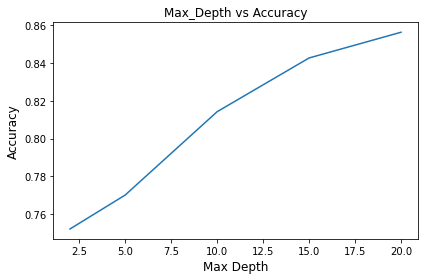

In [22]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

plt.plot(max_depth,score_list)
plt.xlabel("Max Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Max_Depth vs Accuracy")
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('font', family='serif')
plt.tight_layout()
plt.savefig('/Users/pprusty05/google_drive/Data_Mining/Project/plots/maxDepth_accuracy_accident.pdf')
plt.show()

# Decision tree with max depth 20

In [23]:
# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="Severity", featuresCol="scaled_features_vector", maxDepth=20)

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "Severity", "scaled_features_vector").show(5)


+----------+--------+----------------------+
|prediction|Severity|scaled_features_vector|
+----------+--------+----------------------+
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     1.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
|       2.0|     2.0|  (45,[0,1,2,3,4,5,...|
+----------+--------+----------------------+
only showing top 5 rows



In [24]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

In [25]:
accuracy

0.8563148602871328

In [26]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="f1")
f1_score = evaluator.evaluate(predictions)

In [27]:
f1_score

0.8548318553467797

In [28]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="weightedPrecision")
Precision = evaluator.evaluate(predictions)

In [29]:
Precision

0.85389708857649

In [30]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Severity", predictionCol="prediction", metricName="weightedRecall")
Recall = evaluator.evaluate(predictions)

In [31]:
Recall

0.8563148602871328